In [165]:
import numpy as np

def relaxation_time(k_total):
    # Set the rate parameter (λ)
    lambda_param = k_total
    # Generate a random number
    random_number = np.random.exponential(scale=1/lambda_param)
    return random_number
def determine_next_state(current_state):
    lucky_num = np.random.uniform(0,1)
    global k2,k3,k_1,k_2,k_3p,k1s
    if current_state=='E':
        if lucky_num<(k_3p/(k_3p+k1s)):return 'EP'
        else: return 'ES'
    if current_state=='EP':
        if lucky_num<(k3/(k3+k_2)):return 'E'
        else: return 'ES'
    if current_state=='ES':
        if lucky_num<(k2/(k2+k_1)):return 'EP'
        else: return 'E'


In [166]:
k2,k3,k_1,k_2=700,700,700,700
k1s,k_3p=263,263
k_total_of_states = {'E':k_3p+k1s,'ES':k_1+k2,'EP':k3+k_2}
states=['E','ES','EP']
time_trace=[0]
product=[0]

In [167]:
present_state='ES'
present_product=0
duration=0
while max(time_trace) <= 5:
    duration+=relaxation_time(k_total_of_states[present_state])
    next_state = determine_next_state(present_state)
    if present_state == 'EP' and next_state == 'E':
        present_product+=1
    if present_state == 'E' and next_state == 'EP':
        present_product-=1
    present_state=next_state
    product.append(present_product)
    time_trace.append(duration)


In [168]:
old_time,old_product=time_trace,product

In [169]:
k2,k3,k_1,k_2=700,700,700,700
k1s,k_3p=368,158
k_total_of_states = {'E':k_3p+k1s,'ES':k_1+k2,'EP':k3+k_2}
states=['E','ES','EP']
time_trace=[0]
product=[0]
present_state='ES'
present_product=0
duration=0
while max(time_trace) <= 5:
    duration+=relaxation_time(k_total_of_states[present_state])
    next_state = determine_next_state(present_state)
    if present_state == 'EP' and next_state == 'E':
        present_product+=1
    if present_state == 'E' and next_state == 'EP':
        present_product-=1
    present_state=next_state
    product.append(present_product)
    time_trace.append(duration)


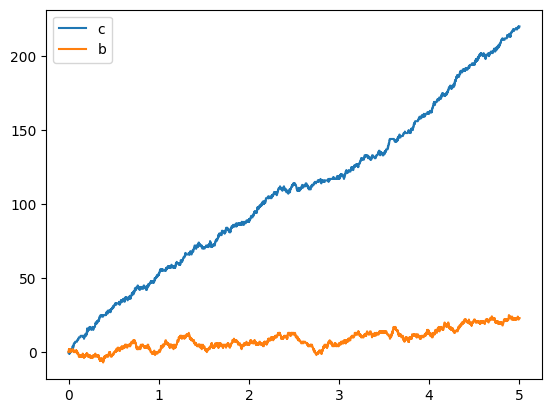

In [170]:
import matplotlib.pyplot as plt
plt.plot(time_trace,product,label='c')
plt.plot(old_time,old_product,label='b')
plt.legend()


My simulation indeed agrees with my calculation, which indicates that the conditions in (c) are more prone to produce the product while the conditions in (b) are not.